# 제약 관련 주식 vs 각종 지표(금값, 뉴스키워드...) 

In [150]:
from pandas_datareader import data
import pandas as pd

from datetime import datetime
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [151]:
import pandas as pd

kosdaq = pd.read_pickle('C:/Users/1-13/Downloads/kosdaq.pickle')
kospi = pd.read_pickle('C:/Users/1-13/Downloads/kospi.pickle')

- 야후 파이낸스 API 활용 : 제약주 종가 데이터, 금값 불러들이기

In [152]:
# 종목 코드
tickerList=['207940.KS','068270.KS','128940.KS','000100.KS','008930.KS','GOLD']

In [153]:
data_source = "yahoo"
start_date = datetime(2019,2,5)
end_date = datetime(2020,2,5)
gold= data.DataReader(tickerList[5],data_source,start_date,end_date)


In [154]:
Samba = data.DataReader(tickerList[0],data_source,start_date,end_date)
celltrion = data.DataReader(tickerList[1],data_source,start_date,end_date)
hanmi_pharm = data.DataReader(tickerList[2],data_source,start_date,end_date)
yuhan = data.DataReader(tickerList[3],data_source,start_date,end_date)
hanmi_science = data.DataReader(tickerList[4],data_source,start_date,end_date)
HLB = data.DataReader('028300.KQ','yahoo','2016-02-05','2018-02-05')

In [155]:
Samba_1 = Samba.Close/Samba.Close[0]
celltrion_1 = celltrion.Close/celltrion.Close[0]
hanmi_pharm_1 = hanmi_pharm.Close/hanmi_pharm.Close[0]
yuhan_1 = yuhan.Close/yuhan.Close[0]
hanmi_science_1 = hanmi_science.Close/hanmi_science.Close[0]
gold_1 = gold.Close/gold.Close[0]


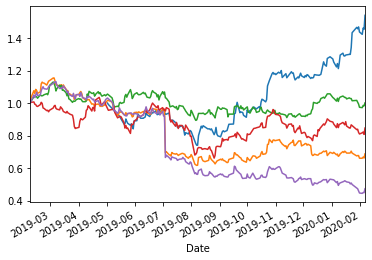

In [156]:
Samba_1.plot()
hanmi_pharm_1.plot()
yuhan_1.plot()
celltrion_1.plot()
hanmi_science_1.plot()


- 빅카인즈 활용 : 일자별 뉴스 키워드 검색량 데이터 불러들이기(신약, 발병, 임상...)

In [157]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline

In [158]:
Samba.rename(columns = {'Close' : 'S_Close'}, inplace = True)
celltrion.rename(columns = {'Close' : 'C_Close'}, inplace = True)
hanmi_pharm.rename(columns = {'Close' : 'H_Close'}, inplace = True)
yuhan.rename(columns = {'Close' : 'Y_Close'}, inplace = True)
hanmi_science.rename(columns = {'Close' : 'HS_Close'}, inplace = True)   
gold.rename(columns = {'Close' : 'G_Close'}, inplace = True)   


In [159]:
Samba_1 = pd.DataFrame(Samba_1)
celltrion_1 = pd.DataFrame(celltrion_1)
hanmi_pharm_1=pd.DataFrame(hanmi_pharm_1)
yuhan_1=pd.DataFrame(yuhan_1)
hanmi_science_1=pd.DataFrame(hanmi_science_1)
gold_1=pd.DataFrame(gold_1)


Samba_1.rename(columns = {'Close' : 'S_Close'}, inplace = True)
celltrion_1.rename(columns = {'Close' : 'C_Close'}, inplace = True)
hanmi_pharm_1.rename(columns = {'Close' : 'H_Close'}, inplace = True)
yuhan_1.rename(columns = {'Close' : 'Y_Close'}, inplace = True)
hanmi_science_1.rename(columns = {'Close' : 'HS_Close'}, inplace = True)          
gold_1.rename(columns = {'Close' : 'G_Close'}, inplace = True)          

In [160]:
bdata = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20191103-20200203 (1).xlsx")
data = bdata["일자"].value_counts().sort_index()
data = pd.DataFrame(data)
data.rename(columns={'날짜':'date'}, inplace=True)
data['date'] = data.index
data["date"] = data["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data["date"] = data["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data.index = data.date
data.rename(columns={'일자':'samba'}, inplace=True)

In [161]:
vdata = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 신약.xlsx")
data_v = vdata["일자"].value_counts().sort_index()
data_v = pd.DataFrame(data_v)
data_v.rename(columns={'날짜':'date'}, inplace=True)
data_v['date'] = data_v.index
data_v["date"] = data_v["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_v["date"] = data_v["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_v.index = data_v.date
data_v.rename(columns={'일자':'vaccine'}, inplace=True)

In [162]:
vidata = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 바이러스.xlsx")
data_vi = vidata["일자"].value_counts().sort_index()
data_vi = pd.DataFrame(data_vi)
data_vi.rename(columns={'날짜':'date'}, inplace=True)
data_vi['date'] = data_vi.index
data_vi["date"] = data_vi["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_vi["date"] = data_vi["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_vi.index = data_vi.date
data_vi.rename(columns={'일자':'virus'}, inplace=True)

In [163]:
data_d = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 질병.xlsx")
data_d = data_d["일자"].value_counts().sort_index()
data_d = pd.DataFrame(data_d)
data_d.rename(columns={'날짜':'date'}, inplace=True)
data_d['date'] = data_d.index
data_d["date"] = data_d["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_d["date"] = data_d["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_d.index = data_d.date
data_d.rename(columns={'일자':'disease'}, inplace=True)

In [164]:
data_w = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 월드컵.xlsx")
data_w = data_w["일자"].value_counts().sort_index()
data_w = pd.DataFrame(data_w)
data_w.rename(columns={'날짜':'date'}, inplace=True)
data_w['date'] = data_w.index
data_w["date"] = data_w["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_w["date"] = data_w["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_w.index = data_w.date
data_w.rename(columns={'일자':'worldcup'}, inplace=True)

In [165]:
data_o = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 발병.xlsx")
data_o = data_o["일자"].value_counts().sort_index()
data_o = pd.DataFrame(data_o)
data_o.rename(columns={'날짜':'date'}, inplace=True)
data_o['date'] = data_o.index
data_o["date"] = data_o["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_o["date"] = data_o["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_o.index = data_o.date
data_o.rename(columns={'일자':'outbreak'}, inplace=True)

In [166]:
data_c = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 임상.xlsx")
data_c = data_c["일자"].value_counts().sort_index()
data_c = pd.DataFrame(data_c)
data_c.rename(columns={'날짜':'date'}, inplace=True)
data_c['date'] = data_c.index
data_c["date"] = data_c["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_c["date"] = data_c["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_c.index = data_c.date
data_c.rename(columns={'일자':'clinic'}, inplace=True)

In [167]:
data_b = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 블록버스터.xlsx")
data_b = data_b["일자"].value_counts().sort_index()
data_b = pd.DataFrame(data_b)
data_b.rename(columns={'날짜':'date'}, inplace=True)
data_b['date'] = data_b.index
data_b["date"] = data_b["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_b["date"] = data_b["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_b.index = data_b.date
data_b.rename(columns={'일자':'block'}, inplace=True)

In [168]:
data_h = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 한미.xlsx")
data_h = data_h["일자"].value_counts().sort_index()
data_h = pd.DataFrame(data_h)
data_h.rename(columns={'날짜':'date'}, inplace=True)
data_h['date'] = data_h.index
data_h["date"] = data_h["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_h["date"] = data_h["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_h.index = data_h.date
data_h.rename(columns={'일자':'hanmi'}, inplace=True)

In [178]:
data_m = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 식약처.xlsx")
data_m = data_m["일자"].value_counts().sort_index()
data_m = pd.DataFrame(data_m)
data_m.rename(columns={'날짜':'date'}, inplace=True)
data_m['date'] = data_m.index
data_m["date"] = data_m["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_m["date"] = data_m["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_m.index = data_m.date
data_m.rename(columns={'일자':'md'}, inplace=True)

In [ ]:
data_m = pd.read_excel("C:/Users/1-13/Downloads/NewsResult_20190205-20200205 식약처.xlsx")
data_m = data_m["일자"].value_counts().sort_index()
data_m = pd.DataFrame(data_m)
data_m.rename(columns={'날짜':'date'}, inplace=True)
data_m['date'] = data_m.index
data_m["date"] = data_m["date"].apply(lambda x : str(x)[:4]+"-"+str(x)[4:6]+'-'+str(x)[6:])
data_m["date"] = data_m["date"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
data_m.index = data_m.date
data_m.rename(columns={'일자':'md'}, inplace=True)

- 상관관계 분석

In [170]:
anal = pd.concat([Samba_1.S_Close, celltrion_1.C_Close, hanmi_pharm_1.H_Close,
                  yuhan_1.Y_Close, hanmi_science_1.HS_Close,gold_1.G_Close,data_v.vaccine,
                  data_vi.virus,data_d.disease,data_w.worldcup,data_o.outbreak,
                 data_c.clinic],axis=1)

C:\Users\1-13\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\1-13\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


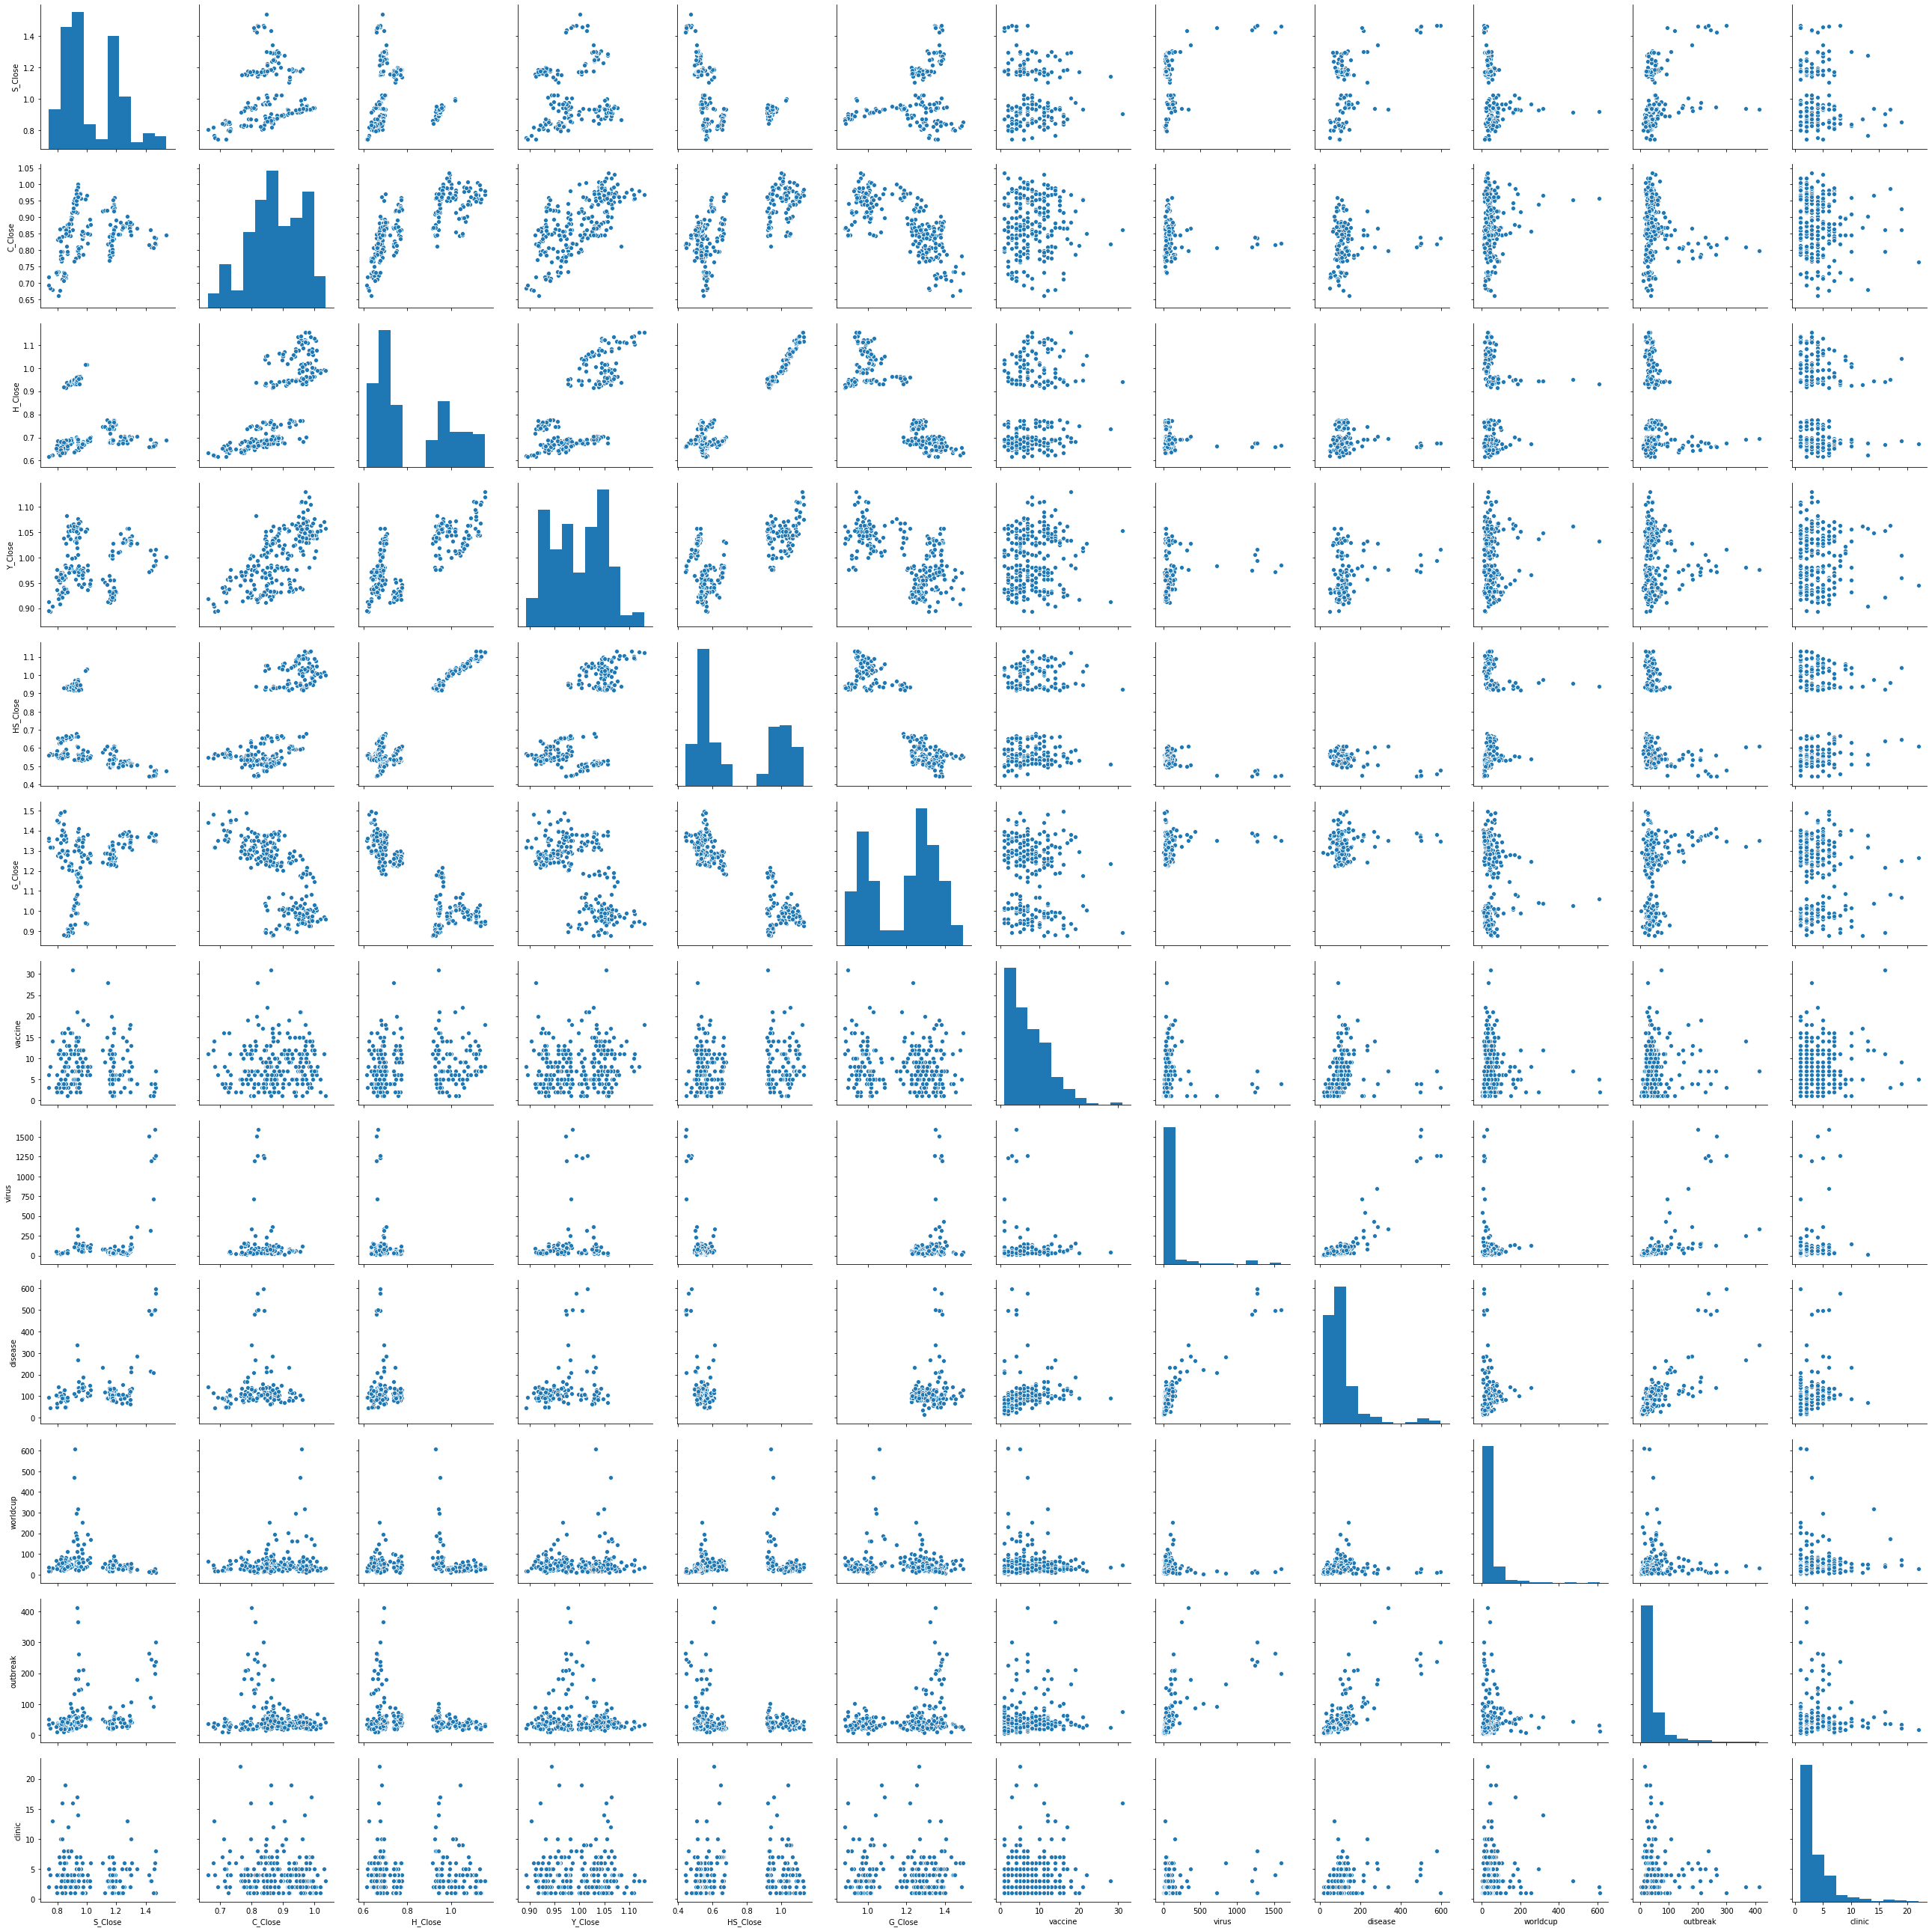

In [171]:
sns.pairplot(anal, height=3)

In [172]:
anal.corr()
# 상관 관계 분석
# 신약 키워드 : 딱히...
# 바이러스 키워드 : 삼바, 한미사이언스(음), 질병(높음)
# 질병 : 삼바, 한미사이언스(음), 바이러스(높음)
# 삼바 : 한미사이언스(음), 바이러스, 질병
# 셀트리온 : 한미(높음), 유한, 한미사이언스
# 유한 양헹 : 셀트리온, 한미, 한미사이
# 한미 사이 : 삼바(음), 셀트, 한미, 유한, 바이러스(음), 질병(음)

,S_Close,C_Close,H_Close,Y_Close,HS_Close,G_Close,vaccine,virus,disease,worldcup,outbreak,clinic
S_Close,1.000000,0.210262,-0.131227,0.105176,-0.468476,0.265414,-0.061245,0.503599,0.478226,-0.207061,0.270541,-0.147998
C_Close,0.210262,1.000000,0.769085,0.692307,0.723667,-0.720334,0.042306,-0.072290,0.060469,0.129192,-0.205370,-0.086933
H_Close,-0.131227,0.769085,1.000000,0.727968,0.964437,-0.903907,0.132000,-0.219567,-0.080667,0.037412,-0.271336,-0.035295
Y_Close,0.105176,0.692307,0.727968,1.000000,0.721106,-0.634622,0.094060,0.164297,0.229180,0.081790,-0.088339,-0.026675
HS_Close,-0.468476,0.723667,0.964437,0.721106,1.000000,-0.915714,0.115869,-0.558065,-0.494072,0.076337,-0.290818,0.028345
G_Close,0.265414,-0.720334,-0.903907,-0.634622,-0.915714,1.000000,-0.141437,0.243567,0.159224,-0.086636,0.282043,-0.025799
vaccine,-0.061245,0.042306,0.132000,0.094060,0.115869,-0.141437,1.000000,-0.063835,0.162753,0.014085,0.159171,0.169745
virus,0.503599,-0.072290,-0.219567,0.164297,-0.558065,0.243567,-0.063835,1.000000,0.898729,-0.149464,0.643873,0.164564
disease,0.478226,0.060469,-0.080667,0.229180,-0.494072,0.159224,0.162753,0.898729,1.000000,0.008666,0.763618,0.231701
worldcup,-0.207061,0.129192,0.037412,0.081790,0.076337,-0.086636,0.014085,-0.149464,0.008666,1.000000,0.006496,0.040564


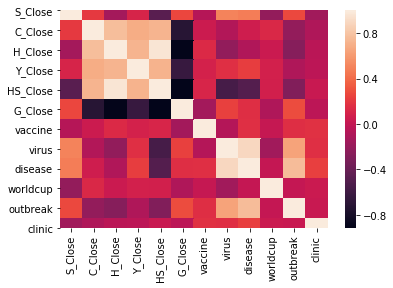

In [173]:
ax1 = sns.heatmap(anal.corr())
plt.show()

In [174]:
res = pd.concat([Samba_1.S_Close, celltrion_1.C_Close, hanmi_pharm_1.H_Close,
                  yuhan_1.Y_Close, hanmi_science_1.HS_Close,gold_1.G_Close,
                  data_vi.virus,data_d.disease],axis=1)

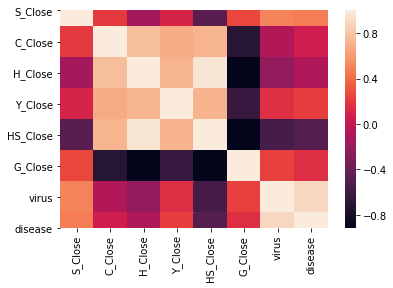

In [175]:
ax2 = sns.heatmap(res.corr())
plt.show()

In [176]:

res.corr()

,S_Close,C_Close,H_Close,Y_Close,HS_Close,G_Close,virus,disease
S_Close,1.000000,0.210262,-0.131227,0.105176,-0.468476,0.265414,0.503599,0.478226
C_Close,0.210262,1.000000,0.769085,0.692307,0.723667,-0.720334,-0.072290,0.060469
H_Close,-0.131227,0.769085,1.000000,0.727968,0.964437,-0.903907,-0.219567,-0.080667
Y_Close,0.105176,0.692307,0.727968,1.000000,0.721106,-0.634622,0.164297,0.229180
HS_Close,-0.468476,0.723667,0.964437,0.721106,1.000000,-0.915714,-0.558065,-0.494072
G_Close,0.265414,-0.720334,-0.903907,-0.634622,-0.915714,1.000000,0.243567,0.159224
virus,0.503599,-0.072290,-0.219567,0.164297,-0.558065,0.243567,1.000000,0.898729
disease,0.478226,0.060469,-0.080667,0.229180,-0.494072,0.159224,0.898729,1.000000


In [177]:
# Assign numeric features by excluding non numeric features
numeric = anal.dtypes[anal.dtypes != 'object'].index

# Display the skewness of each column and sort the values in descending order 
skewness = anal[numeric].apply(lambda x: x.skew()).sort_values(ascending=False)

# Create a dataframe and show 5 most skewed features 
sk_anal = pd.DataFrame(skewness,columns=['skewness'])
sk_anal['skw'] = abs(sk_anal)
sk_anal.sort_values('skw',ascending=False).drop('skw',axis=1).head()

,skewness
worldcup,5.807793
virus,4.056534
outbreak,3.655149
disease,2.964762
clinic,2.346117


In [107]:
# As a general rule of thumb, skewness with an absolute value less than 0.5 is considered as a acceptable range of skewness for normal distribution of data
skw_feature = skewness[abs(skewness) > 0.5].index

# Transform skewed features to normal distribution by taking log(1 + input)
anal[skw_feature] = np.log1p(anal[skw_feature])


In [108]:
anal = pd.get_dummies(anal)
print(anal.shape)

(368, 12)


- 회귀분석

In [109]:
X_train = anal.iloc[:anal.shape[0],:]
X_test = anal.iloc[anal.shape[0]:,:]

In [110]:
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))

training shape:(368, 12), test shape:(0, 12)


In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 368 entries, 2019-02-04 to 2020-02-06
Data columns (total 12 columns):
S_Close     174 non-null float64
C_Close     246 non-null float64
H_Close     246 non-null float64
Y_Close     246 non-null float64
HS_Close    246 non-null float64
G_Close     254 non-null float64
vaccine     321 non-null float64
virus       162 non-null float64
disease     184 non-null float64
worldcup    366 non-null float64
outbreak    366 non-null float64
clinic      301 non-null float64
dtypes: float64(12)
memory usage: 37.4 KB


In [81]:
y_d_train = anal.loc[:,'S_Close']
X_d_train = anal.drop('S_Close',axis=1)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_d_train, y_d_train, test_size=0.2, random_state=11)

In [85]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score

In [90]:
RFC = RandomForestRegressor(random_state = 1234, n_jobs=-1)
RFC.fit(X_train,y_train)

C:\Users\1-13\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').